In [1]:
from pathlib import Path

import networkx as nx
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Medium Articles Dataset

We provide a dataset of medium articles which have to be tagged to corresponding topics (software-development, artificial intellignece, Ui/UX). Along with articles we have subscriptions lists. The articles may be related by common subscription lists. The goal is to exploit this naturally occuring network structure for classifying articles to topics. Hence, it is a 3-way node classification task

In [2]:
def read_data(dir_name: str, file_name: str):
    """Read the medium articles with lists

    Args:
        dir_name (str): Root directory of the medium title files and lists.

    Returns:
        final_data: merged dataframes with articles and lists
    """

    final_data = pd.read_csv(dir_name+"/"+file_name+".csv")
    return final_data

In [3]:
final_data = pd.read_csv("data/pipeline_assignment_data/full_data_without_labels.csv")
final_data

,article,title,subtitle,author,date,list
0,https://medium.com/@maniakacademy/code-demo-sh...,Code/Demo Share: Palo Alto Firewall Network In...,IP is broken as a unit of Control! IDENTITY as...,Sebastian Maniak,2022-08-17,https://medium.com/@zemmali1990/list/aws-49f68...
1,https://medium.com/towards-artificial-intellig...,Clustering using Social Graph Network,A Social Graph Network can be formed when ther...,Naveed Ahmed Janvekar,2022-01-29,https://medium.com/@TomaszCieplak/list/graph-d...
2,https://medium.com/@sarafparam/transformers-fo...,Transformers for Time-Series,Forecasting still remains to be dominated by S...,Param Saraf,2020-10-20,https://medium.com/@sergiobonato/list/time-ser...
3,https://medium.com/towards-data-science/review...,Reviewing A/B Testing Course by Google on Udacity,Read to find out how A/B tests are performed a...,Suyash Maheshwari,2020-05-10,https://medium.com/@online.rajib/list/ml-c2cac...
4,https://medium.com/towards-data-science/a-comp...,A Comprehensive Hands-on Guide to Transfer Lea...,Deep Learning on Steroids with the Power of Kn...,Dipanjan (DJ) Sarkar,2018-11-14,https://medium.com/@farhanhanavi07/list/deep-l...
...,...,...,...,...,...,...
27713,https://medium.com/cometheartbeat/deep-learnin...,Deep Learning Techniques you Should Know in 2022,"Over the years, Deep Learning has really taken...",Nisha Arya Ahmed,2022-04-21,https://medium.com/@vigguvenki/list/deep-learn...
27714,https://medium.com/towardsdev/intro-to-object-...,Intro to Object-Oriented Programming For Data ...,Implement a simple Linear Regression with OOP ...,Bex T.,2021-04-12,https://medium.com/@or.matalon2/list/oop-4aad5...
27715,https://medium.com/towards-data-science/learn-...,Learn Enough Docker to be Useful,Part 1: The Conceptual Landscape — Containers ...,Jeff Hale,2019-01-09,https://medium.com/@vaibhavb2473/list/machine-...
27716,https://medium.com/berndruecker/moving-from-em...,Moving from embedded to remote workflow engines,"For a long time, we have advocated for an arch...",Bernd Rücker,2022-02-08,https://medium.com/@giamma80/list/java-3c31810...


In [4]:
train = read_data("data/pipeline_assignment_data","train")
train

,index,article,title,subtitle,author,date,list,labels
0,3279,https://medium.com/dev-genius/how-to-convert-m...,How to Convert MP4 Videos to Animated GIFs,With Kazam and ffmpeg on GNU/Linux systems — I...,Jordi Bassaganas,2022-06-02,https://medium.com/@zzpzaf.se/list/var-4f4a92d...,software-development
1,26139,https://medium.com/towards-data-science/a-cust...,"Custom SpaCy Model Deployment with AWS ECR, Sa...",A tutorial on how to deploy SpaCy with AWS. — ...,Cheng,2021-06-04,https://medium.com/@munivinayk/list/nlp-242e66...,artificial-intelligence
2,9946,https://medium.com/towards-data-science/5-book...,5 Books To Grow As A Leader In Data Analytics,Are you a senior analyst growing towards a man...,Valentin Mucke,2022-01-15,https://medium.com/@Nikhil_Phadtare/list/books...,artificial-intelligence
3,2353,https://medium.com/@unsuitable001/package-cron...,"package:cronet, an HTTP Dart/Flutter package w...",My Dart Google Summer of Code 2021 experience....,Soumyadip Monda,2021-08-21,https://medium.com/@djibi.jb/list/flutter-e53c...,software-development
4,8266,https://medium.com/towards-data-science/statis...,Statistics in Python — Collinearity and Multic...,Understand how to discover multicollinearity i...,Wei-Meng Lee,2021-10-01,https://medium.com/@abhiagar/list/stats-765e27...,software-development
...,...,...,...,...,...,...,...,...
22377,6669,https://medium.com/towards-data-science/linkin...,Linking Documents in a Semantic Graph (Part 2),How to design your own graph using TigerGraph ...,Akash Kau,2020-05-27,https://medium.com/@william.sheffel/list/tiger...,artificial-intelligence
22378,18163,https://medium.com/towards-data-science/automa...,Automate Video Editing with Python,Automate the editing of explainer videos to cr...,Samir Saci,2022-11-10,https://medium.com/@jstart.james/list/photogra...,software-development
22379,13001,https://medium.com/towards-data-science/make-p...,Make Python Run As Fast As C,Faster Python Code With Numba — The Speed Issu...,Lukas Frei,2021-08-04,https://medium.com/@jstart.james/list/system-e...,artificial-intelligence
22380,25234,https://medium.com/towards-data-science/6-juli...,6 Julia Frameworks to Create Desktop GUI’s and...,Julia is used for a lot of deeply technical ap...,Logan Kilpatrick,2022-01-05,https://medium.com/@gurumurthi/list/julia-3583...,software-development


In [5]:
test = read_data("data/pipeline_assignment_data","test")
test

,index,article,title,subtitle,author,date,list,labels
0,2291,https://medium.com/towards-data-science/how-to...,How to Use the IBM Watson Tone Analyzer to Per...,How to use the IBM Watson Artificial Intellige...,Graham Harrison,2022-01-02,https://medium.com/@4ndres.gaviria/list/nlp-to...,artificial-intelligence
1,7292,https://medium.com/towards-data-science/surviv...,Survival Analysis: Intuition & Implementation ...,There is a statistical technique which can ans...,Anurag Pandey,2019-01-06,https://medium.com/@jz5246/list/analytics-559c...,artificial-intelligence
2,6768,https://medium.com/experience-stack/embrace-co...,Embrace Complexity (Part 1),Why all organisations should build internal ne...,Tony Seale,2022-02-04,https://medium.com/@yasha.brener/list/data-man...,software-development
3,15003,https://medium.com/towards-data-science/every-...,"Every Complex DataFrame Manipulation, Explaine...","Melts, pivots, joins, explodes, & more — Panda...",Andre Ye,2020-07-22,https://medium.com/@4ndres.gaviria/list/dataop...,artificial-intelligence
4,19782,https://medium.com/towards-data-science/macroe...,Macroeconomic & Financial Factors and Ordinary...,Econometrics model using Arbitrage Pricing The...,Sarit Maitra,2020-06-27,https://medium.com/@halo9pan/list/quantitative...,software-development
...,...,...,...,...,...,...,...,...
3945,14424,https://medium.com/towards-data-science/normal...,Normalization vs Standardization — Quantitativ...,Stop using StandardScaler from Sklearn as a de...,Shay Geller,2019-04-04,https://medium.com/@farhanhanavi07/list/applie...,artificial-intelligence
3946,18949,https://medium.com/@petruknisme/getting-starte...,Getting Started with Covenant C2 for Red Teaming,Command and Control is part of Red Teaming tac...,Aan,2021-11-21,https://medium.com/@jimmy.winghang/list/mitre-...,software-development
3947,9305,https://medium.com/towards-data-science/how-to...,How to Create a Vector-Based Movie Recommendat...,Building a movie recommendation system using t...,Michelangiolo Mazzeschi,2021-12-10,https://medium.com/@subhasis.jethy/list/recomm...,artificial-intelligence
3948,24337,https://medium.com/towards-data-science/how-to...,How to Use Pandas for Big Data,Run distributed workload with Pandas on Spark ...,Edwin Tan,2022-01-25,https://medium.com/@jethro_torczon/list/big-da...,artificial-intelligence


In [6]:
train["labels"].value_counts()

software-development       11586
artificial-intelligence    10646
ux                           150
Name: labels, dtype: int64

In [7]:
test["labels"].value_counts()

software-development       2022
artificial-intelligence    1899
ux                           29
Name: labels, dtype: int64

In [8]:
train.subtitle

0        With Kazam and ffmpeg on GNU/Linux systems — I...
1        A tutorial on how to deploy SpaCy with AWS. — ...
2        Are you a senior analyst growing towards a man...
3        My Dart Google Summer of Code 2021 experience....
4        Understand how to discover multicollinearity i...
                               ...                        
22377    How to design your own graph using TigerGraph ...
22378    Automate the editing of explainer videos to cr...
22379    Faster Python Code With Numba — The Speed Issu...
22380    Julia is used for a lot of deeply technical ap...
22381    For years now, most of us have heard the word ...
Name: subtitle, Length: 22382, dtype: object

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
"""Generate necoding for labels using label encoder"""
multilabel_binarizer = LabelEncoder()
multilabel_binarizer.fit(train["labels"])

Y = multilabel_binarizer.transform(train["labels"])
texts = [x[0]+" " + x[1] for x in zip(train.title,train.subtitle)]

In [10]:
from gensim.models import Word2Vec
"""Train word2vec model on title + subtitles to establish a baseline without network structure"""
all_texts = [x[0]+" " + x[1] for x in zip(final_data.title,final_data.subtitle)]

word2vec_model = Word2Vec([text.split(" ") for text in all_texts], vector_size=128, window=10, epochs=30, sg=1, workers=4,min_count=1)

In [11]:
from sklearn.svm import SVC
embeddings = []
"""Infer word2vec embeddings for article titles and subtitles using trained word2vec model
    """
for text in texts:
    embeddings.append(np.mean([word2vec_model.wv[word] for word in text.split(" ")], axis=0))
print(np.vstack(embeddings).shape)
X_word2vec = np.vstack(embeddings)


(22382, 128)


In [12]:
"""Train a SVM classifier on generated article embeddings
    """
svc = SVC()
svc.fit(X_word2vec,Y)

SVC()

In [13]:
test_embeddings = []
text_texts = [x[0]+" " + x[1] for x in zip(test.title,test.subtitle)]
"""Compute embeddings for test samples
    """
for text in text_texts:
    test_embeddings.append(np.mean([word2vec_model.wv[word] for word in text.split(" ")], axis=0))
print(np.vstack(test_embeddings).shape)
X_word2vec_test = np.vstack(test_embeddings)


(3950, 128)


In [14]:
"""Generate predictions using the SVM classifier for test articles
    """
predictions_w2v = svc.predict(X_word2vec_test)


In [15]:
"""Encode predictions
    """
Y_test = multilabel_binarizer.transform(test["labels"])

Y_test

array([0, 0, 1, ..., 0, 0, 0])

In [16]:
from sklearn import metrics
"""Compute Macro f1"""
print(metrics.f1_score(Y_test, predictions_w2v,average="macro"))


0.5534297975047987


In [17]:
print(metrics.classification_report(Y_test, predictions_w2v))


              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1899
           1       0.84      0.82      0.83      2022
           2       0.00      0.00      0.00        29

    accuracy                           0.83      3950
   macro avg       0.55      0.56      0.55      3950
weighted avg       0.82      0.83      0.82      3950



/Users/diwu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diwu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diwu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pipeline Overview

our goal is to contruct a graph from  given data by connecting nodes that atleast share one common subscription list.

This step is followed by a random walk to construct node embeddings.

Then the node embeddings are employed for the task of topic classification.

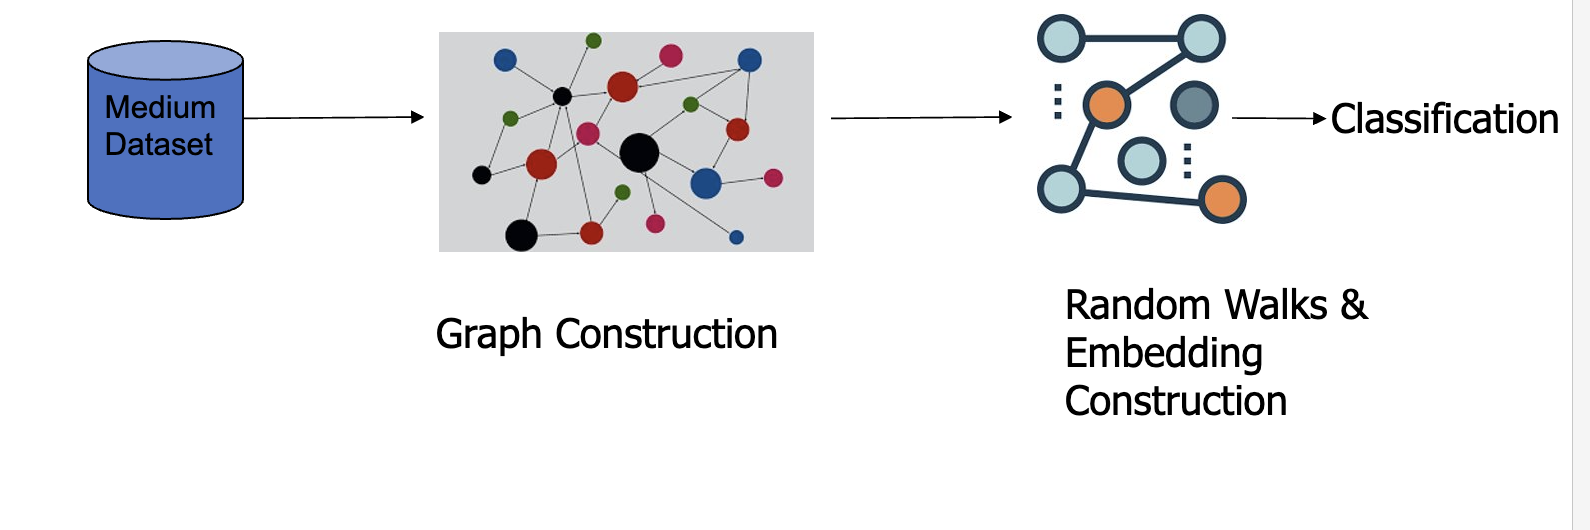

# Form graph

Our goal is to contruct a graph from  given data by connecting nodes that atleast share one common subscription list. The networkx part has already been written for you. 

Your task here is to write the module to construct the edges and find isolated nodes and also analyze the resulting graph by reporting number of edges, number of nodes, number of isolated nodes. 



In [18]:


from typing import List,Dict


def get_edges(data: pd.DataFrame, nodes) -> List:
    """ Given the dataframe with articles and lists return the set of edges
        Args:
        data (pd.DataFrame): The medium dataset
        nodes: dict (nodeid: article title)
    Returns:
            edges (List[tuple]): List of edges"""
    edges = []    
    ## START
    ## i want to get the value of the column "lists" for each row, but some values an have multiple lists splited by space
    ## so i need to split the values and iterate over them
    for index_current, row in data.iterrows():
        current_lists = set(row["list"].split("; "))
        ## iterate over the nodes with index bigger than the current one
        ## so we can avoid to check the same pair of nodes twice
        for index_neighbor in range(index_current+1,len(nodes)):
                neighbor_lists = set(data["list"][index_neighbor].split(" "))
                if current_lists & neighbor_lists:
                    edges.append((index_current,index_neighbor))
    ##END
    return edges




In [19]:
def get_nodes(data: pd.DataFrame) -> Dict:
    """ Given the dataframe with articles and lists return the set of nodes
        Args:
        data (pd.DataFrame): The medium dataset
    Returns:
        nodes: dict (nodeid: article title)"""
    nodes = {}
    for index, row in data.iterrows():
        if index not in nodes:
            nodes[index] = row["title"]
    print(len(nodes))
    return nodes

In [20]:
import networkx as nx
def form_graph(data: pd.DataFrame) -> nx.Graph:
    """Forms graph from medium article dataset.

    Args:
        data (pd.DataFrame): The medium dataset

    Returns:
        G (nx.Graph): The graph.

       """
    texts = [x[0]+" " + x[1] for x in zip(data.title,data.subtitle)]
    nodes = get_nodes(data)
    edges = get_edges(data, nodes)
    graph = nx.Graph()
    graph.add_nodes_from(list(nodes.keys()))
    graph.add_edges_from(edges)
    return graph


In [21]:
graph = form_graph(final_data)


27718


# 1. Analyze the number of nodes, edges and isolated nodes.

In [24]:
print("Number of nodes: ", graph.number_of_nodes())
print("Number of edges: ", graph.number_of_edges())
print("Number of isolated nodes: ", nx.number_of_isolates(graph))


Number of nodes:  27718
Number of edges:  1179396
Number of isolated nodes:  485


# Node2Vec

Here the task is to perform random walks on the graph formed in the previous step and compute embeddings for the nodes using the random walk results.

You can use gensim to compute embeddings, however for random walks you are expected to implement without relying on networkx. Your weblab assignment would aid you in the same. For gensim you are expected to use Word2Vec. However you  can explore on best ways to configure the hyperparams for your word2vec instance for better donwstream classification task.

In [23]:
# Find isolated nodes with no neighbors before random walks
### START
isolated = [x for x in nx.isolates(graph)]
### END

In [24]:
def random_walks(G: nx.Graph, num_walks: int, walk_length: int, isolated: List) -> np.ndarray:
    """Perform random walks on the graph.

    Args:
        G (nx.Graph): The graph.
        num_walks (int): The number of random walks for each node.
        walk_length (int): The number of nodes in a random walk.
        isolated (List[int]): list of isolated nodeids

    Returns:
        np.ndarray: The random walks, shape (n_nodes * num_walks, walk_length)
    """
    result = []
    ### START
    for node in graph.nodes():
        if node not in isolated:
            for _ in range(num_walks):
                walk = [node]
                # We have already put node in the walk so walk_length - 1
                for _ in range(walk_length - 1):
                    current = walk[-1]
                    neighbors = list(graph.neighbors(current))
                    next_node = np.random.choice(neighbors)
                    walk.append(next_node) 
                result.append(walk)
    ## END
    return np.asarray(result)

In [25]:
walks = random_walks(graph, 10, 10,isolated)

In [26]:
from gensim.models import Word2Vec
def fit_node2vec(walks: np.ndarray, vector_size: int, window: int, epochs: int) -> Word2Vec:
    """Train a Node2Vec model on random walks. Uses the GenSim Word2Vec implementation.

    Args:
        walks (np.ndarray): The random walks.
        vector_size (int): Node representation size.
        window (int): Window width.
        epochs (int): Number of epochs.

    Returns:
        Word2Vec: The trained model.
    """
   ### START
    # Convert the walks to string type
    walks_str = [[str(node) for node in walk] for walk in walks]
    model = Word2Vec(walks_str, vector_size=vector_size, window=window, epochs=epochs, sg=1, workers=4,min_count=1)

    return model
   ### END

In [27]:
model = fit_node2vec(walks, 128, 5, 10)

In [28]:
#embeddings = {doc: model.dv[doc] for doc in model.dv.index_to_key}


In [29]:
def get_nodeids(data: pd.DataFrame):
    """Get nodeids from graph

    Args:
        data (pd.DataFrame): medium articles dataset

    Returns:
        nodes (dict): nodeids with mapped article titles
    """
    nodes = {}
    for index, row in data.iterrows():
        if row["index"] not in nodes:
            nodes[row["index"]] = row["title"]
    return nodes

In [30]:
"""Get train and test nodes from the graph
    """
train_nodes = get_nodeids(train)
test_nodes = get_nodeids(test)
train_nodes = list(train_nodes.keys())
test_nodes = list(test_nodes.keys())

In [31]:
len(test_nodes)

3950

In [32]:
"""Get node2vec embeddings (nodeid to embeddings mapping)
    """
embeddings = {word: model.wv[word] for word in model.wv.index_to_key}


# Word2vec + Node2vec

In [33]:
"""Compute train and test embeddings.
Concatenate the word2vec embeddings of article titles
with the node2vec embeddings suing dictionary from previous step.
Dimension 1 of your embeddings should be 256.
 Consider isolated nodes and handle them when computing embeddings"""
X_train_n2v_w2v = np.hstack(
    (
        X_word2vec, 
        np.array([embeddings[str(x)] if x not in isolated else X_word2vec[idx] for idx, x in enumerate(train_nodes)  ], dtype=np.float32),
    )
)
X_test_n2v_w2v = np.hstack(
    (
        X_word2vec_test,
        np.array([embeddings[str(x)] if x not in isolated else X_word2vec_test[idx] for idx, x in enumerate(test_nodes)  ], dtype=np.float32),
    )
)

In [34]:
X_test_n2v_w2v.shape,X_train_n2v_w2v.shape

((3950, 256), (22382, 256))

In [35]:
X_train_n2v_w2v.shape

(22382, 256)

In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC,SVC

svc = SVC()
svc.fit(X_train_n2v_w2v,Y)

SVC()

In [37]:
Y.shape

(22382,)

In [38]:
X_test_n2v_w2v.shape

(3950, 256)

In [39]:
predictions_n2v_w2v = svc.predict(X_test_n2v_w2v)

In [40]:
from sklearn import metrics
print(metrics.f1_score(Y_test, predictions_n2v_w2v,average="macro"))


0.7502211746488999


In [41]:
print(metrics.classification_report(Y_test, predictions_n2v_w2v))


              precision    recall  f1-score   support

           0       0.80      0.88      0.83      1899
           1       0.86      0.79      0.83      2022
           2       0.87      0.45      0.59        29

    accuracy                           0.83      3950
   macro avg       0.84      0.70      0.75      3950
weighted avg       0.83      0.83      0.83      3950



# Only node2vec features

In [42]:
X_train_n2v =  np.array([embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(train_nodes)  ], dtype=np.float32)

X_test_n2v =np.array([embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(test_nodes)  ], dtype=np.float32)
 

In [43]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC,SVC

svc = SVC()
svc.fit(X_train_n2v,Y)

SVC()

In [44]:
predictions_n2v = svc.predict(X_test_n2v)

In [45]:
from sklearn import metrics
print(metrics.f1_score(Y_test, predictions_n2v,average="macro"))


0.7295570841760771


In [46]:
print(metrics.classification_report(Y_test, predictions_n2v))


              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1899
           1       0.82      0.77      0.80      2022
           2       0.87      0.45      0.59        29

    accuracy                           0.80      3950
   macro avg       0.82      0.68      0.73      3950
weighted avg       0.80      0.80      0.80      3950



# 2. Compare performance of word2vec only, node2vec embeddings only (above) and word2vec+node2vec settings.
  Report your intuition below in text as to why one works better than other and to what extent network structure helps compare dto only using word2vec embeddings of titles and subtitles (first result).

 You can also plot the tsne plot of embeddings to gain more intuition

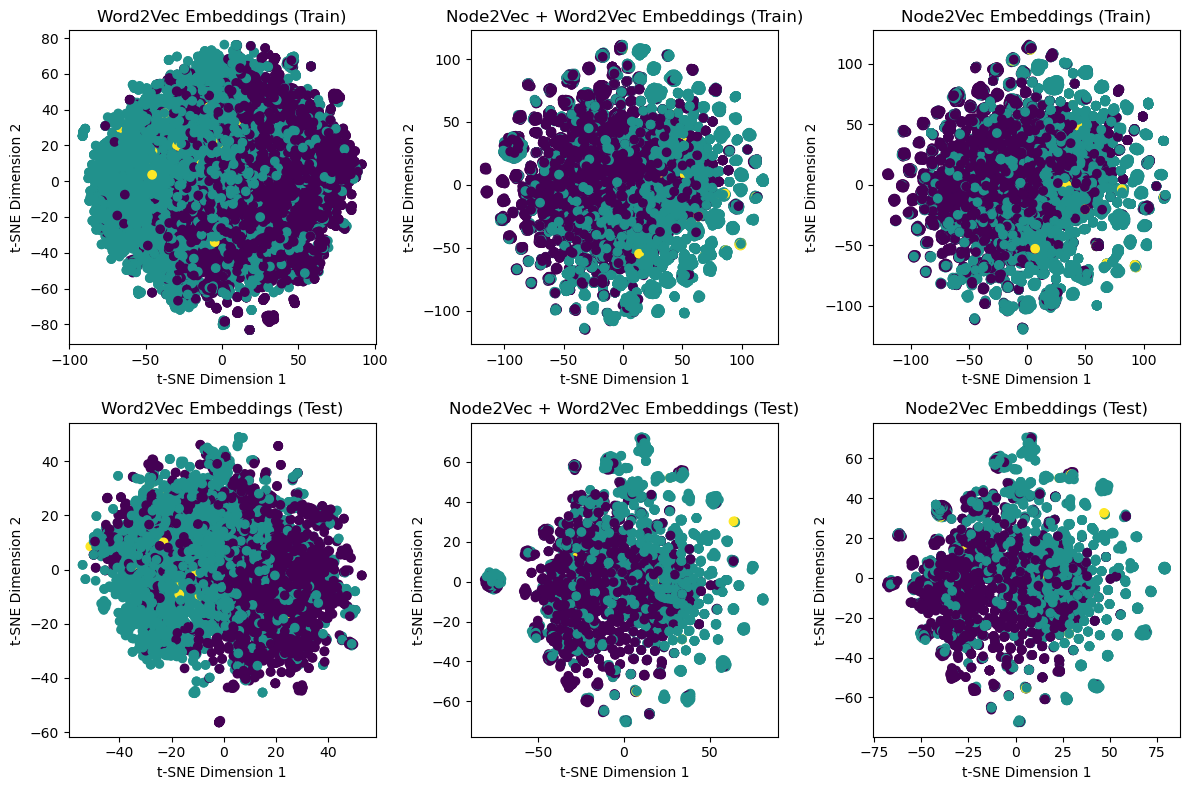

In [47]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Create a t-SNE object
tsne = TSNE(n_components=2, random_state=42)

# Perform t-SNE on the embeddings
X_word2vec_tsne = tsne.fit_transform(X_word2vec)
X_word2vec_test_tsne = tsne.fit_transform(X_word2vec_test)
X_train_n2v_w2v_tsne = tsne.fit_transform(X_train_n2v_w2v)
X_test_n2v_w2v_tsne = tsne.fit_transform(X_test_n2v_w2v)
X_train_n2v_tsne = tsne.fit_transform(X_train_n2v)
X_test_n2v_tsne = tsne.fit_transform(X_test_n2v)

# Plot the t-SNE visualizations
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.scatter(X_word2vec_tsne[:, 0], X_word2vec_tsne[:, 1], c=Y, cmap='viridis')
plt.title('Word2Vec Embeddings (Train)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(2, 3, 4)
plt.scatter(X_word2vec_test_tsne[:, 0], X_word2vec_test_tsne[:, 1], c=Y_test, cmap='viridis')
plt.title('Word2Vec Embeddings (Test)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(2, 3, 2)
plt.scatter(X_train_n2v_w2v_tsne[:, 0], X_train_n2v_w2v_tsne[:, 1], c=Y, cmap='viridis')
plt.title('Node2Vec + Word2Vec Embeddings (Train)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(2, 3, 5)
plt.scatter(X_test_n2v_w2v_tsne[:, 0], X_test_n2v_w2v_tsne[:, 1], c=Y_test, cmap='viridis')
plt.title('Node2Vec + Word2Vec Embeddings (Test)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(2, 3, 3)
plt.scatter(X_train_n2v_tsne[:, 0], X_train_n2v_tsne[:, 1], c=Y, cmap='viridis')
plt.title('Node2Vec Embeddings (Train)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(2, 3, 6)
plt.scatter(X_test_n2v_tsne[:, 0], X_test_n2v_tsne[:, 1], c=Y_test, cmap='viridis')
plt.title('Node2Vec Embeddings (Test)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()


word2vec
| accuracy | 0.83 |
| ---- | ---- |
| macro avg f1-score | 0.55 |
| label2 precision | 0.00 |

node2vec + word2vec
| accuracy | 0.83 |
| ---- | ---- |
| macro avg f1-score | 0.75 |
| label2 precision | 0.87 |

node2vec
| accuracy | 0.80 |
| ---- | ---- |
| macro avg f1-score | 0.73 |
| label2 precision | 0.87 |


## Method 1 (Word2Vec on Title and Subtitle):
### Performance:
Precision for label 0 and label 1 is decent, but label 2 has 0 precision.
Overall accuracy is 83%, with macro-average F1-score of 55%.
### t-SNE Plot:
For the 3rd label, the number of articles is very few.
## Method 2 (Combined Word2Vec and Node2Vec):
### Performance:
Precision for label 0 and label 1 is similar to Method 1.
Precision for label 2 is high (0.87), similar to Method 2.
Overall accuracy is 83%, with macro-average F1-score of 75%.
Improved macro-average F1-score compared to both Method 1 and Method 3.
### t-SNE Plot:
Comparing the test plots of Method 2 and Method 3, they look very similar and Method 2 has a few more isolated clusters in the plot.
## Method 3 (Node2Vec on Graph Structure):
### Performance:
Precision for label 0 and label 1 is good, and label 2 has high precision (0.87).
Overall accuracy is 80%, with macro-average F1-score of 73%.
Noticeable improvement in precision for label 2 compared to Method 1.
### t-SNE Plot:
The datapoints are collapsed in Method 2 and 3, while the datapoints in Method 1 are more scatterd. 

## Observations and Intuition:
### Label 2 Improvement:
Both Method 2 and Method 3 show significant improvement in predicting articles with label 2 compared to Method 1. The graph structure appears to provide valuable information for this particular label.
### Combined Embeddings Impact:
Method 2, which combines Word2Vec and Node2Vec, achieves the best macro-average F1-score. This suggests that leveraging both content-based and network-based features contributes to better overall performance. By assigning zero vectors to isolated nodes in Method 3, you essentially place them at the origin in the embedding space. This approach might collapse the embeddings of isolated nodes, making them visually indistinguishable in the t-SNE plot. However in Method 2 we replaced them with Word2Vec embeddings, which improved the performance on isolated nodes. 
### Node2Vec Strength:
Method 2 and Method 3, utilizing Node2Vec, outperform Method 1 in terms of F1-score. The network structure captured by Node2Vec helps enhance the model's understanding of relationships between articles.
### Class Imbalance:
The imbalanced distribution of labels may impact performance, especially for the minority class (label 2). Both network structure and combined embeddings seem beneficial in addressing this challenge.

## Why one works better than other:
### Word2Vec Embeddings Only (Method 1):
Strengths:

Word2Vec captures semantic relationships between words, making it effective in understanding the context of titles and subtitles. It captures the inherent meaning of the textual content, allowing the model to recognize articles with similar language.

Limitations:

Word2Vec focuses solely on the content of individual articles and does not consider the broader network relationships between articles.

### Node2Vec Embeddings (Method 3):
Strengths:

Node2Vec leverages the network structure created by shared subscription lists, capturing relationships between articles. It may identify communities or groups of articles that share common readership, aiding in categorization.

Limitations:

Node2Vec might not capture the semantic meaning of articles; it relies heavily on the structure of the network.

### Combined Word2Vec and Node2Vec Embeddings (Method 2):
Strengths:

By combining Word2Vec and Node2Vec, the model benefits from both semantic content understanding and network structure awareness.

## Network Structure Contribution:
### Advantages:
The network structure helps identify articles that are related based on shared readership, even if their content differs. In cases where articles have limited textual content, network structure becomes crucial for categorization.
### Extent of Contribution:
The extent of the network structure's contribution depends on the characteristics of the dataset. If the network relationships are meaningful and indicative of topic similarities, the contribution can be substantial.

# Kaggle
### short summary 
For the Kaggle competition, we focused on tuning the walk length of our random walk embeddings. Since we need to explore the graph thoroughly and capture the relationships locally, we need to choose a proper random walk length. 

We started with a walk length of 15 and gradually varied the value, then submitted on Kaggle to see the precision score. In the end, we found a walk length of 10 seems to be the one with the best performance. 

Also, we tried to change the vector length of the embeddings to a longer one, but seems it does not work well. We tried to increase the number of walks for each node, by observing the scores on Kaggle, we think after 10 to 15 times of walks, the precision does not change much. 

We also tried to use only Word2Vec or Node2Vec. As expected, the scores were significantly lower than Node2Vec + Word2Vec, and the intuition of this we have already written in the markdown above. 

For better precision, we chose a few hyperparameters of the SVC and made a grid search for their combination. We got this idea from the bonus assignment of the Machine Learning course. We also set the scorer to a macro F1 score since that is the way the Kaggle competition evaluates our submissions. 

In [56]:
kaggle_train = read_data("data/pipeline_assignment_data","kaggle_train")
kaggle_test = read_data("data/pipeline_assignment_data","kaggle_test")
multilabel_binarizer = LabelEncoder()
multilabel_binarizer.fit(kaggle_train["labels"])

kaggle_train_Y = multilabel_binarizer.transform(kaggle_train["labels"])
kaggle_train_texts = [x[0]+" " + x[1] for x in zip(kaggle_train.title,kaggle_train.subtitle)]
kaggle_train_embeddings = []
"""Infer word2vec embeddings for article titles and subtitles using trained word2vec model
    """
for text in kaggle_train_texts:
    kaggle_train_embeddings.append(np.mean([word2vec_model.wv[word] for word in text.split(" ")], axis=0))
print(np.vstack(kaggle_train_embeddings).shape)
X_word2vec_kaggle_train = np.vstack(kaggle_train_embeddings)

kaggle_test_embeddings = []
kaggle_test_texts = [x[0]+" " + x[1]  for x in zip(kaggle_test.title,kaggle_test.subtitle)]
"""Compute embeddings for test samples
    """
for text in kaggle_test_texts:
    kaggle_test_embeddings.append(np.mean([word2vec_model.wv[word] for word in text.split(" ")], axis=0))
print(np.vstack(kaggle_test_embeddings).shape)
X_word2vec_kaggle_test = np.vstack(kaggle_test_embeddings)

(26332, 128)
(1386, 128)


In [58]:
np.random.seed(1756)
walks = random_walks(graph, 11, 10,isolated) 
model = fit_node2vec(walks, 128, 5, 10)

In [50]:
# model = fit_node2vec(walks, 128, 20, 8)

In [59]:
kaggle_train_nodes = get_nodeids(kaggle_train)
kaggle_test_nodes = get_nodeids(kaggle_test)
kaggle_train_nodes = list(kaggle_train_nodes.keys())
kaggle_test_nodes = list(kaggle_test_nodes.keys())

embeddings = {word: model.wv[word] for word in model.wv.index_to_key}
# node2vec+word2vec embeddings
X_kaggle_train_n2v = np.hstack(
    (
        X_word2vec_kaggle_train,
        np.array([embeddings[str(x)] if x not in isolated else X_word2vec_kaggle_train[idx] for idx, x in enumerate(kaggle_train_nodes)  ], dtype=np.float32),
    )
)
X_kaggle_test_n2v = np.hstack(
    (
        X_word2vec_kaggle_test,
        np.array([embeddings[str(x)] if x not in isolated else X_word2vec_kaggle_test[idx] for idx, x in enumerate(kaggle_test_nodes)  ], dtype=np.float32),
    )
)

In [52]:
# # only node2vec embeddings
# X_kaggle_train_n2v =  np.array([embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(kaggle_train_nodes)  ], dtype=np.float32)

# X_kaggle_test_n2v =np.array([embeddings[str(x)] if x not in isolated else np.zeros((128)) for idx, x in enumerate(kaggle_test_nodes)  ], dtype=np.float32)

In [53]:
# svc = SVC()
# svc.fit(X_kaggle_train_n2v,kaggle_train_Y)
# predictions = svc.predict(X_kaggle_test_n2v)

The block below is for Grid Search, tuning the hyperparameters of the classifier in order to improve the precision. It took us 500 minutes. So if you want to get the best hyperparameters, just check the markdown below instead of running this block. 

In [61]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
parameters = {'C': [1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']}
svc = SVC()
f1_macro_scorer = make_scorer(f1_score, average='macro')
clf = GridSearchCV(svc, parameters, scoring=f1_macro_scorer,n_jobs=-1, verbose=10)
clf.fit(X_kaggle_train_n2v,kaggle_train_Y)

best_params = clf.best_params_
# Print the best hyperparameters
print("Best Hyperparameters:", best_params)
predictions = clf.predict(X_kaggle_test_n2v)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 5/5; 1/72] START C=1, degree=2, gamma=scale, kernel=linear..................
[CV 5/5; 2/72] START C=1, degree=2, gamma=scale, kernel=poly....................
[CV 1/5; 2/72] START C=1, degree=2, gamma=scale, kernel=poly....................
[CV 3/5; 1/72] START C=1, degree=2, gamma=scale, kernel=linear..................
[CV 1/5; 1/72] START C=1, degree=2, gamma=scale, kernel=linear..................
[CV 2/5; 2/72] START C=1, degree=2, gamma=scale, kernel=poly....................
[CV 4/5; 2/72] START C=1, degree=2, gamma=scale, kernel=poly....................
[CV 3/5; 2/72] START C=1, degree=2, gamma=scale, kernel=poly....................
[CV 2/5; 1/72] START C=1, degree=2, gamma=scale, kernel=linear..................
[CV 4/5; 1/72] START C=1, degree=2, gamma=scale, kernel=linear..................
[CV 4/5; 2/72] END C=1, degree=2, gamma=scale, kernel=poly;, score=0.691 total time= 1.6min
[CV 1/5; 3/72] START C=1, degree=2, 

Best Hyperparameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
# # only word2vec embeddings
# predictions = svc.predict(X_word2vec_kaggle_test)

In [62]:
predicted_labels = multilabel_binarizer.inverse_transform(predictions)

In [63]:
# Read the sample submission file
df_submission = pd.read_csv("data/pipeline_assignment_data/sample_submission.csv")

# Replace the 'Label' column in the original DataFrame with new predictions
df_submission['Label'] = predicted_labels

# Create a new CSV file with updated predictions
df_submission.to_csv("data/pipeline_assignment_data/new_submission.csv", index=False)